<a href="https://colab.research.google.com/github/jamartinezv2023/IntrGraphQL/blob/main/content/U1%20LAB%2001%20-%20WARMUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 01.01 - WARM UP

In [7]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [8]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.01", varname="student");

logging in as jose.martinez7@udea.edu.co... please wait

-------------
using course session 2021.deeplearning::udea.pre.20252
success!! you are logged in
-------------


## Task 1: An operation with matrices

Given the following matrices and vectors:

- $X \in \mathbb{R}^{m\times n}$
- $y \in \mathbb{R}^m$
- $W \in \mathbb{R}^{n\times 1}$
- $b \in \mathbb{R}$

Complete the following function so that it computes the following value:

$$\text{mean}\bigg(\big(\text{relu}(X \times W + b) - y\big)^2\bigg)$$

observe that:

- $X\times W \in \mathbb{R}^m$ and $b \in \mathbb{R}$, so $b$ gets added (_broadcasted_) to all elements of $X \times W$
- $\text{mean}$ is the mean of the elements of an vector with $m$ elements.
- The result is a number $\in \mathbb{R}$
- $\text{relu}(z)=\text{max}(0,z)$ is a function $\mathbb{R}\rightarrow\mathbb{R}$ that when applied to a vector is also **broadcasted** (applied individually to each element of the vector)

**CHALLENGE**: Solve it with a single line of Python code (not counting the `relu` function definition).

In [9]:
import numpy as np

def operation(X,y,W,b):
    relu = lambda x: x*(x>0)
    return np.mean((relu(X.dot(W) + b) - y) ** 2) # YOUR CODE HERE

test your code with the following case, which should result in `0.15848`

In [10]:
X = np.array([[-0.09348275, -0.17182042, -0.29143506],
              [ 0.34581753,  0.37816707,  0.39850916],
              [ 0.23478876, -0.07832256,  0.10793716],
              [-0.1746856 , -0.10240038, -0.27959607]])

y = np.array([[-0.47312685],
              [ 0.42086142],
              [ 0.44194868],
              [ 0.46536898]])
W = np.array([[0.12650597],
              [0.49952987],
              [0.34470552]])

b = -0.02

In [11]:
operation(X,y,W,b)

np.float64(0.15848356715672943)

test your code with random input values. This is actually what the **automatic grader** does

In [12]:
m,n = np.random.randint(5, size=2)+2
X = np.random.random(size=(m,n))-0.5
W = np.random.random(size=(n,1))-0.5
b = np.random.random()-0.5
y = np.random.random(size=n)-0.5
print ("X=\n", X)
print ("y=\n", y)
print ("W=\n", W)
print ("b=\n", b)
print ("an_operation=", operation(X,y,W,b))

X=
 [[-0.19116077 -0.31589079  0.35388836 -0.38620994 -0.33343765  0.28819349]
 [ 0.0097338  -0.17266008 -0.47279661  0.04924906  0.37059723 -0.21415901]
 [-0.23400008  0.3493465  -0.22614815 -0.49904805  0.48057963 -0.30424854]]
y=
 [ 0.46208802  0.2320143  -0.00640463  0.32686374  0.14725887  0.42243705]
W=
 [[-0.15061499]
 [ 0.44737346]
 [ 0.13885421]
 [-0.25559203]
 [ 0.28005411]
 [ 0.3624331 ]]
b=
 0.2252330370823432
an_operation= 0.06049436100066067


**Submit your solution**

In [13]:
student.submit_task(namespace=globals(), task_id='T1');

## Task 2: Function `argmax`

Complete the following function such that when, given as argument a function `f(x)` with $x\in\mathbb{R}$, returns the value of $x$ which maximizes `f(x)`. If there is more than one value that maximizes the function, just return any one of those.

Your return value must be exact up to 1 decimal position, and must be a number of type `float` (not a `numpy` array or any other type of object)

**HINT**: Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `BFGS` method, with a `lambda` function.

**CHALLENGE**: Solve it with one single line of code (not counting the `import`)

In [14]:
def argmax(f):
    from scipy.optimize import minimize
    return round(float(minimize(lambda x: -f(x), 0).x), 1)



Test your code, the following two functions must have their max on `x=1` and `x=-2` approx.

In [15]:
def A(x):
    return -(x-1)**2

B = lambda x: -(x+2)**4

Text(0.5, 1.0, 'B(X)')

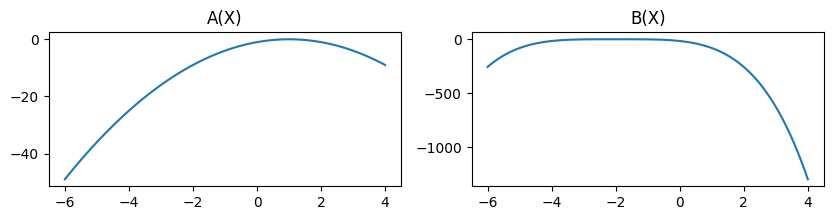

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-6,4, 100)
plt.figure(figsize=(10,2))
plt.subplot(121); plt.plot(x, A(x)); plt.title("A(X)")
plt.subplot(122); plt.plot(x, B(x)); plt.title("B(X)")

In [17]:
argmax(A), argmax(B)

/tmp/ipython-input-1984545408.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(minimize(lambda x: -f(x), 0).x), 1)


(1.0, -2.0)

**Submit your solution**

In [18]:
student.submit_task(namespace=globals(), task_id='T2');